<a href="https://colab.research.google.com/github/Komal-londhe/Marketing-Campaign-Prediction/blob/main/Project_MarkettingCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

Companies develop marketing campaigns to increase their product sales.
Marketing campaign prediction helps to identify how customers would respond to their future campaigns. Applied in various domains like Banking, Mobile Telecommunication, Life Insurances, Ecommerce websites.


Predicting customer response helps in 
- assisting marketers in understanding consumer behaviours and trends
- predicting future shifts and planning their campaigns accordingly.
- company can also internally study any possible operational causes and improve its product offerings.


# Project Aim

- To predict customer response
- Highlighting key indicators responsible for customer response
- Use ML algorithms to build prediction models, evaluate accuracy and performance of these models
- Finding out the best model for our business problem

# Data Loading

In [ ]:
# Importing Required libraries and modules 

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import plotly.express as px
import math
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
# Loading data using read_csv()
dataset = pd.read_csv('marketing_campaign.csv')

In [ ]:
# Check with the data by default gives first 5 rows
dataset.head()

,ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
0,5524;1957;Graduation;Single;58138;0;0;2012-09-...
1,2174;1954;Graduation;Single;46344;1;1;2014-03-...
2,4141;1965;Graduation;Together;71613;0;0;2013-0...
3,6182;1984;Graduation;Together;26646;1;0;2014-0...
4,5324;1981;PhD;Married;58293;1;0;2014-01-19;94;...


The dataset we get from importing is unusable in it's current form. A single column captures all of our various variables and we'll need to clean it well if we want to continue with our analysis. We will load again by separating with ';'

In [ ]:
# using separator ';'
dataset = pd.read_csv('marketing_campaign.csv', sep=';')

In [ ]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Information

In [ ]:
# checking rows and columns
print("\n Number of rows in dataset : " , dataset.shape[0])
print("\n Number of columns in dataset : " , dataset.shape[1])
print("\n Columns in dataset : ", dataset.columns)


 Number of rows in dataset :  2240

 Number of columns in dataset :  29

 Columns in dataset :  Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [ ]:
# info() gives column information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From above dataset, we can see that there are **3 categorical variables **(whose datatype is object), and **26 numerical variables**. 

Our Dependent target variable is **'Response'**
Other are independent variables.

There are some demographic information of customers like - ID, Year_Birth, Education, Marital_Status, Income. Other are product information.

**Description of each variable**

ID: the unique identification code for every customer

Year_Birth: The Year of a customer's birth

Education: The level of education that a customer completed

Marital_Status: Status of Marriage

Income: Annual Income

Kidhome: # of children under the age of 13 in Customer's household

Teenhome: # of children between 13-19 in Customer's household

Dt_Customer: Date of Customer Enrollment

Recency: # of days since last purchase

MntWines: Dollar amount of Wines purchased in last 2 years

MntFruits: Dollar amount of Fruits purchased in last 2 years

MntMeatProducts: Dollar amount of Meat products purchased in the last 2 years

MntFishProducts: Dollar amount of Fish products purchased in the last 2 years

MntSweetProducts: Dollar amount of Sweet products purchased in the last 2 years

MntGoldProds: Dollar amount of Gold products purchased in the last 2 years

NumDealsPurchases: # of purchases made with discount

NumWebPurchases: # of purchases made through the company's website

NumCatalogPurchases: # of purchases made using the catalog

NumStorePurchases: # of purchases made directly in-store

NumWebVisitsMonth: # of visits made through company's website

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


Unfortunately there is no information about ZCost and ZRevenue and I'm personally unfamilar with these terms. We'll have to look into these variables specifically to tell what kind of data they are and if they can help in our analysis.

In [ ]:
#Unique values in each categorical variable:
print("Number of unique values in Education of dataset : ", dataset["Education"].nunique())
print("Different Education level : \n", dataset["Education"].unique())

print("\nNumber of unique values in Marital_Status of dataset : ", dataset["Marital_Status"].nunique())
print("Different Marital_Status  : \n", dataset["Marital_Status"].unique())

print("\nNumber of unique values in Customer enrollment date of dataset : ", dataset["Dt_Customer"].nunique())


Number of unique values in Education of dataset :  5
Different Education level : 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Number of unique values in Marital_Status of dataset :  8
Different Marital_Status  : 
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Number of unique values in Customer enrollment date of dataset :  663


# Data Cleaning

**Null value Removal**

In [ ]:
dataset.columns.to_series().groupby(dataset.dtypes).groups
dataset.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Only income column contains 'null' values. Lets check how many null values it contains.

In [ ]:
dataset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income Column contains 24 null values. We can fill the null values, insteading of removing the rows by taking the mean of the values

In [ ]:
# Filling the null values with mean instead of dropping the rows
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [ ]:
# Checking again after filling null values
dataset.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

As you can see above, at this stage there are no null values left in the dataset.

**Outliers detection and removal.**

Removing the following features :

categorical feature with only one class

feature with only a singular value

In [ ]:
# filtering the features with only one class or singular value
for col in dataset.columns :
    if len(dataset[col].value_counts()) == 1 :
        print(dataset[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


As we can see there are two features in our dataset have constant/ single values, hence dropping them as it does not have any impact on the response variable.

In [ ]:
dataset.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# Data Preprocessing

As we have to visualize the data, we will convert few columns into format which will be helpful for visualization

In [ ]:
# Converting Income into 5 groups
dataset['Income'] = pd.qcut(dataset['Income'], q=5, labels=False, precision=0)
dataset['Income'].value_counts()

3    448
1    448
4    448
2    448
0    448
Name: Income, dtype: int64

In [ ]:
dataset['n_kids'] = dataset['Kidhome'] + dataset['Teenhome'] # Adding two columns to get total number of kids
dataset['Marital_Status'] = dataset['Marital_Status'].replace('Together', 'Livein')  # Making marital status into 5 groups
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single') # Combining marital status Alone, YOLO, Absurd into one group that is Single

In [ ]:
# as 'Dt_customer' was previously encoded by label encoder, we will get back the original values.
# dataset['Dt_Customer'] = le.inverse_transform(dataset['Dt_Customer'])

# converting to datetime format
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'], format="%Y-%m-%d")

#from customer date, we can find out the total number of days of customer with the company
import datetime
from datetime import datetime, date

for i in range(0, len(dataset)):
    dataset['Days_with_company'] = datetime.today().date()-dataset['Dt_Customer'].dt.date

print(dataset['Days_with_company'].dtype)
dataset['Days_with_company'].head()

dataset['Days_with_company'] = dataset['Days_with_company'].apply(lambda x: int(x/np.timedelta64(1, 'D')))
dataset['Days_with_company'].dtype

# days with company are divided into quantiles to plot them
dataset['Days_with_company'] = pd.qcut(dataset['Days_with_company'], q=4, labels=['Legacy Customer','Old customer','New Customer','Current Customer'], precision=0)
dataset['Days_with_company'].value_counts()

timedelta64[ns]


New Customer        566
Old customer        560
Legacy Customer     560
Current Customer    554
Name: Days_with_company, dtype: int64

In [ ]:
# dropping the date column as it is not required now
dataset = dataset.drop(columns="Dt_Customer")

In [ ]:
# calculating age as it is in the year 2020
dataset['Customer_age'] = 2020 - dataset['Year_Birth']
# dropping the 'year_Birth' feature from the data as it is now redundant
dataset.drop('Year_Birth', axis=1, inplace=True)
dataset['Customer_age'].head()

0    63
1    66
2    55
3    36
4    39
Name: Customer_age, dtype: int64

In [ ]:
#In order to improve the signal-noise ratio in our data, we will be further discretizing this feature into 11 bins, where each bin would represent a range of 5 years.
dataset['Customer_age'] = pd.cut(dataset['Customer_age'], bins=11, labels=False, include_lowest=True)

In [ ]:
dataset['Kidhome'] = (dataset['Kidhome']/dataset['n_kids'])*100
dataset['Teenhome'] = (dataset['Teenhome']/dataset['n_kids'])*100
# Fill null values
dataset['Kidhome'].fillna(0, inplace=True)
dataset['Teenhome'].fillna(0, inplace=True)

# renaming the feature 'Kidhome' and 'Teenhome'
dataset = dataset.rename(columns= {'Kidhome':'percent_kids', 'Teenhome':'percent_teenagers'})

# rounding up the values in percent_kids and percent_teenagers to 0 decimals.
dataset['percent_kids'] = dataset['percent_kids'].apply(lambda x: round(x, 0))
dataset['percent_teenagers'] = dataset['percent_teenagers'].apply(lambda x: round(x, 0))

# Data Visualization

**1. Target Variable**

The following pie chart shows the percentage of observations that correspond to each class of the response variable: no(0) and yes(1). As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (85.1%).

In [ ]:
print("Number customers responded to the campaign as Yes/No \n", dataset["Response"].value_counts())
response=dataset['Response'].value_counts()
fig = px.pie(dataset, values=response.values, names=['No','Yes'],color_discrete_sequence=px.colors.sequential.RdBu,
            title='Response Breakdown')
fig.show()

Number customers responded to the campaign as Yes/No 
 0    1906
1     334
Name: Response, dtype: int64


Let us visualize data based on Response variable. Try to find reasons why customer responded or not responded to the previous campaign

**2. Visualization of Education and Income with Response of the customers.**

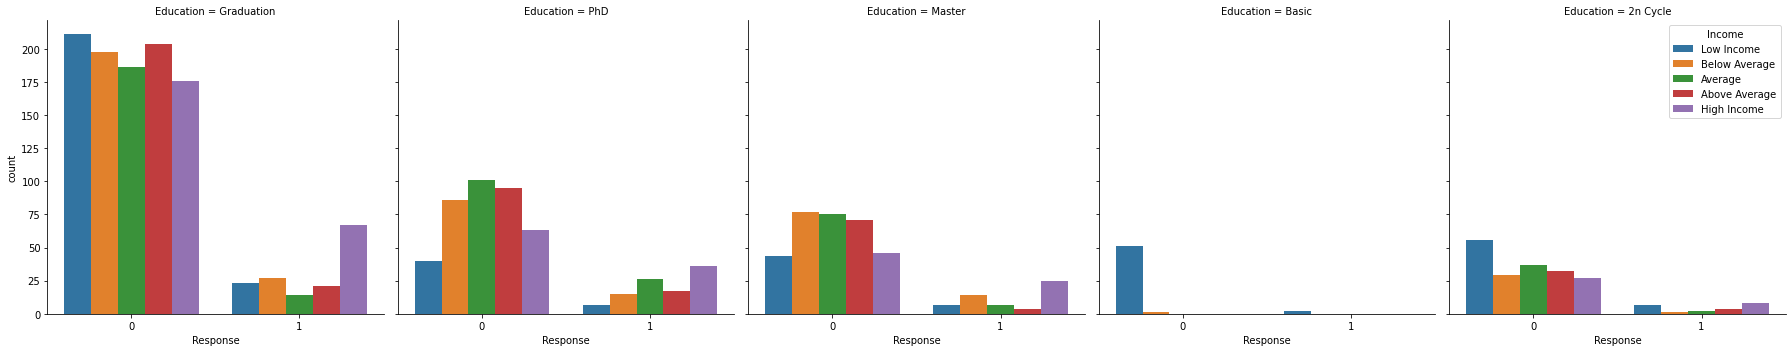

In [ ]:
g = sns.catplot(x='Response', hue='Income', col='Education', data=dataset, kind='count', legend=False)
plt.legend(title = 'Income',labels=['Low Income','Below Average','Average','Above Average', 'High Income'])
plt.show(g)

Observation :

- Customers who have a education level of 'Graduation' show the highest rejection levels to the last campaign, where the effect of 'Income' was insignificant towards the kind of response.

- Customers who have a educational background of 'PhD' and 'Master', show approximately similar levels of rejection towards the last campaign.

- Among the customers having a 'PhD', we can see the lowest levels of rejection response towards the last campaign is being showed by the customers having a low income, and the level of rejection responses gradually grows as the income levels increase peaking at the customers with above average income and then a slight decrease of rejection levels by customers with high income.

- The level of the customer's income is insignificant towards their levels of a rejection response, for the customers having a 'Master' in education.

- For the customers with a 'Basic' educational background we can see tht the rejection levels are reletively lower than for customers with other educational backgrounds; but within these class of customers, the ones having a low level of income show significantly higher level of a rejection response towards the last campaign.

**3. Visualizatoin of Marital_Status and n_kids with Response.**

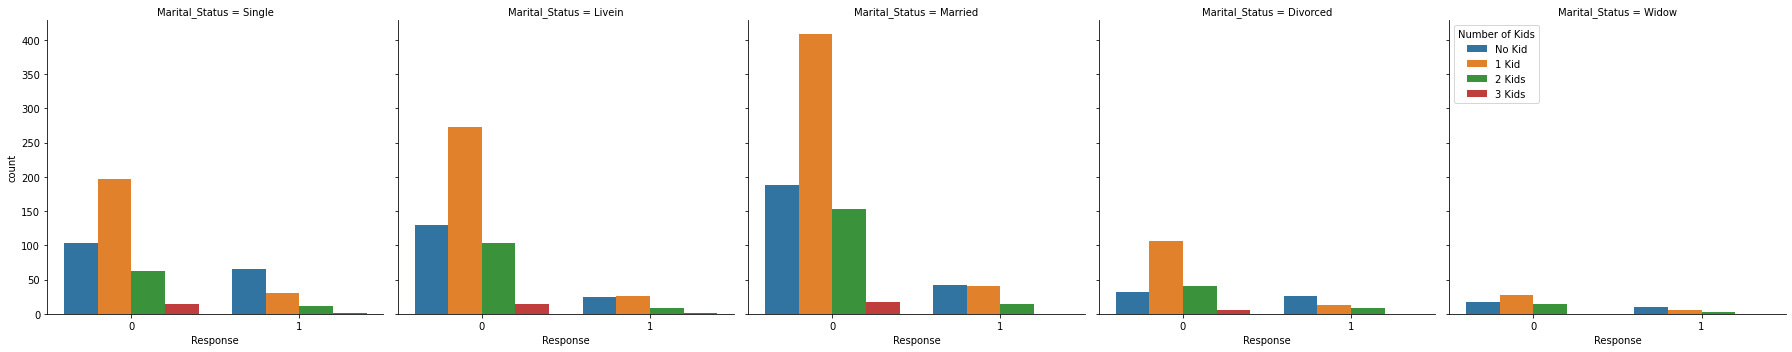

In [ ]:
h = sns.catplot(x='Response', hue='n_kids', col='Marital_Status', data=dataset, kind='count', legend=False)
plt.legend(title = 'Number of Kids',labels=['No Kid','1 Kid','2 Kids','3 Kids'])
plt.show(g)

Observtions :

- We can clearly see that a majority of the rejection responses towards the last campaign is from customers who are married, followed by customers who are in a live-in relationship and who are single.

- We can also see a clear pattern, that customers having 1 kid irrespective of their maritl status, show the relatively highest rejection responses across the population.

**4. Visualization of Customer_age, Days_with_company and Response**

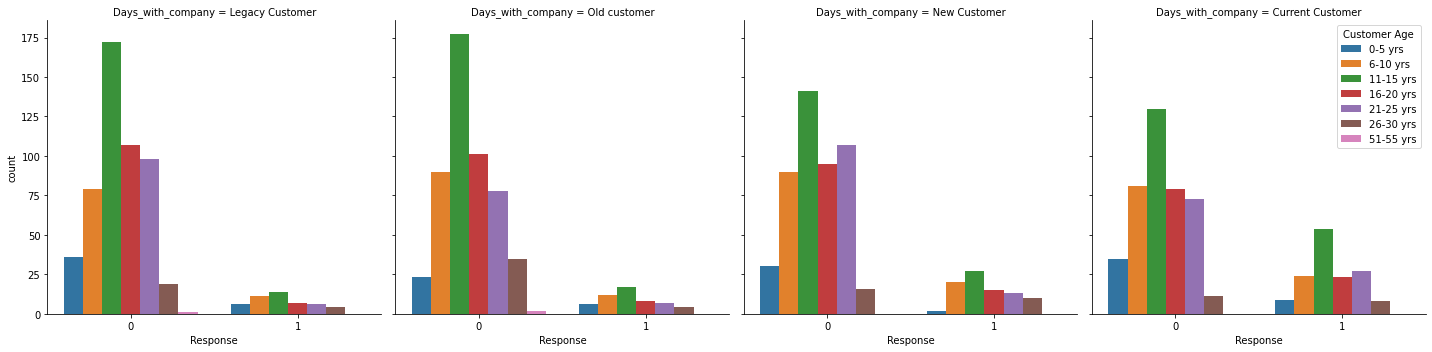

In [ ]:
i = sns.catplot(x='Response', hue='Customer_age', col='Days_with_company', data=dataset, kind='count', legend=False)
plt.legend(title = 'Customer Age',labels=['0-5 yrs','6-10 yrs','11-15 yrs','16-20 yrs','21-25 yrs','26-30 yrs','51-55 yrs'])
plt.show(i)

Observations :

- We can see a similar level of relatively higher rejection responses from customers who are legecy and old customers.

- We can also see a similar level of relatively lower but independently higher, rejection levels from new and current customers.

- A common pttern among all kinds of customers is that the highest levels of rejection responses are shown by the cutomers in the age 11 to 20 and 51 to 55.

**5. Visualization of percent_kids, percent_teenager with Response.**

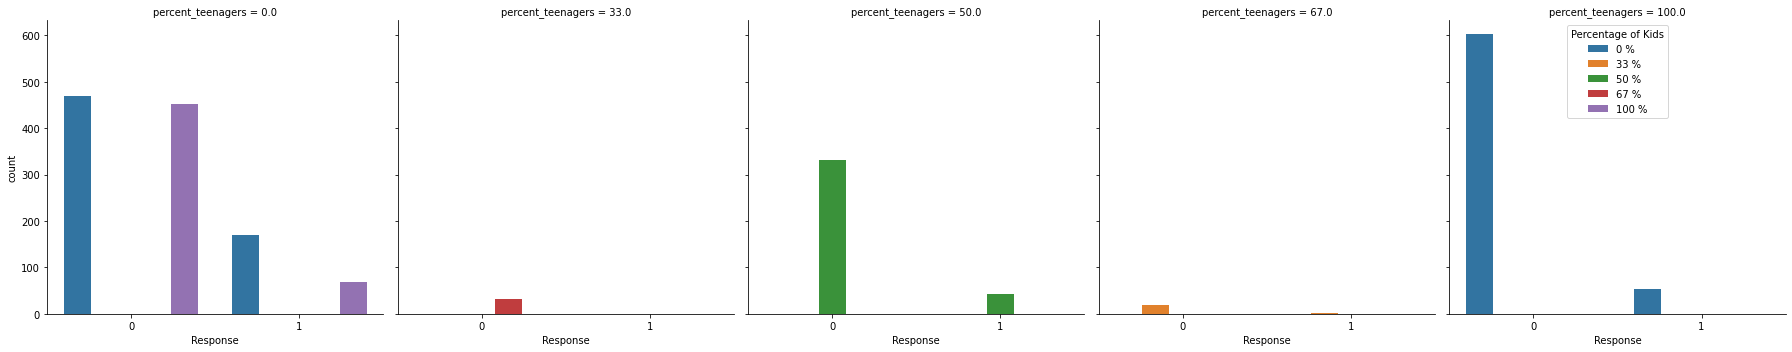

In [ ]:
j = sns.catplot(x='Response', hue='percent_kids', col='percent_teenagers', data=dataset, kind='count', legend=False)
plt.legend(title = 'Percentage of Kids',labels=['0 %','33 %','50 %','67 %','100 %'])
plt.show(j)

Observations :

We can see high levels of rejection responses from customers :

- having 0 teenagers or kids

- having only kids and o teenagers

- having equally kids and teenagers

- having only teenagers

On the contrary, customers with 70% kids and 30% teenagers are showing lower rejection responses towards the last campaign.

To summarize the above observations, customers with all kinds of combinations of kids and teenagers (except 30-70 ratio) in their family show similarly high rejection responses.

In [ ]:
dataset_1 = dataset[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
dataset_2 = dataset[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

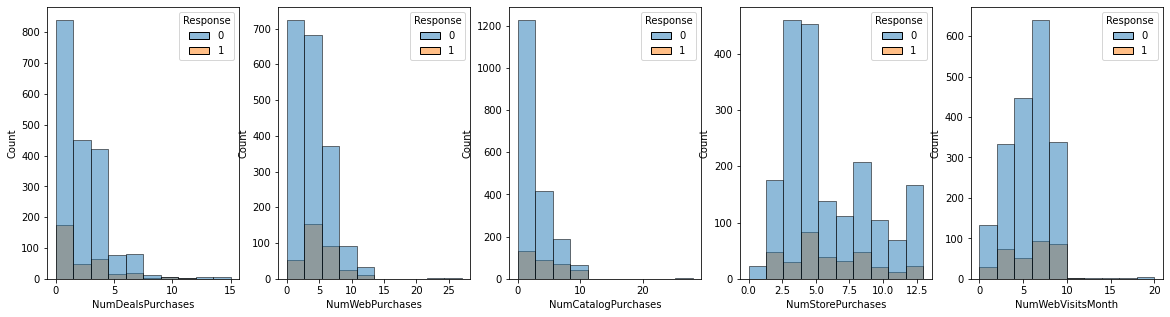

In [ ]:
## lets visualize distribution of purchase with repect to Response.
plots_per_row = 5
number_of_plots = dataset_1.select_dtypes(exclude=['object']).shape[-1]
fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in dataset_1.select_dtypes(exclude=['object']).columns.to_series().items():    
    a = sns.histplot(data=dataset_1, x=col, hue=dataset['Response'], ax=axes[i],kde=False,bins=10)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()
fig.set_figwidth(20)
fig.set_figheight(5)

plt.show()

Observations :

We can observe from above that there is a high level of rejection responses from customers belonging to the type :

- customers who did 1 to 4 web purchases from the company website (Fig 2)

- customers who did 1 to 4 purchases with discount deals (Fig 1)

- customers who did 1 to 3 purchases from the catalog (Fig 3)

- customers who did 2 to 4 purchases directly from the stores (Fig 4)

- customers who were visiting the website from 5 to 10 times a month are showing the relatively highest rejection responses (Fig 5)

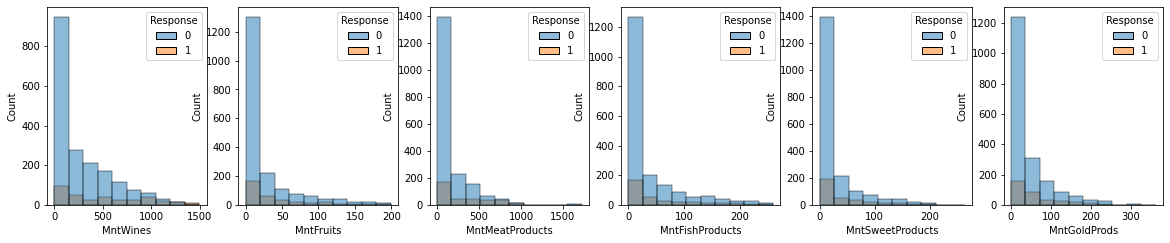

In [ ]:
## lets visualize distribution of purchase with repect to Response.

plots_per_row = 6
number_of_plots = dataset_2.select_dtypes(exclude=['object']).shape[-1]
fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in dataset_2.select_dtypes(exclude=['object']).columns.to_series().items():    
    a = sns.histplot(data=dataset_2, x=col, hue=dataset['Response'], ax=axes[i],kde=False,bins=10)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()
fig.set_figwidth(20)
fig.set_figheight(8)

plt.show()

I don't see any striking patterns from above visualizations

Lets try to find positive and negative co relation between the variables based on response

In [ ]:
dataset_cor = dataset[['Education', 'Marital_Status', 'Income', 'percent_kids',
       'percent_teenagers', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'n_kids', 'Days_with_company',
       'Customer_age']]
correlations = dataset_cor.corrwith(dataset.Response)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
Income                 0.149774
NumWebPurchases        0.148730
MntGoldProds           0.139850
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
NumDealsPurchases      0.002238
dtype: float64

Most Negative Correlations: 
 Complain            -0.001707
NumWebVisitsMonth   -0.003987
Customer_age        -0.009306
percent_kids        -0.059995
percent_teenagers   -0.154962
n_kids              -0.169163
Recency             -0.198437
dtype: float64


Text(0.5, 1.0, 'Correlation with Response \n')

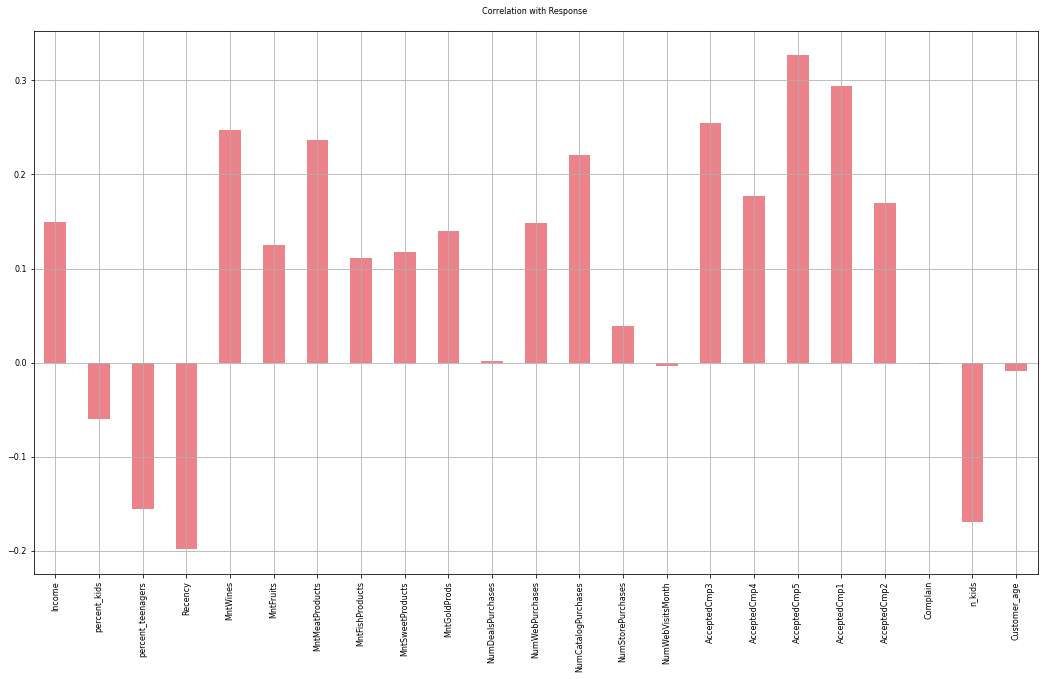

In [ ]:
correlations = dataset_cor.corrwith(dataset.Response)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 8, 
        color = '#ec838a',
        rot = 90, grid = True)
plt.title('Correlation with Response \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "8", fontfamily = "sans-serif")

From the correlation plot, we infer that 

- most accepted campaign is Campaign 5 followed by campaign 1. 
- This can help inprove marketing strategies for business. Campaign 2 had least response.
- As the campaigning increased, response increased
- On the other hand, recency (i.e number of days since last purchase )increased, response decreased. 
- Interestingly , as number of kids increased, response decreased.

# Data Evaluation

**Label Encode Categorical data**:

Machine Learning algorithms can typically only have numerical values as their independent variables. Hence label encoding is quite pivotal as they encode categorical labels with appropriate numerical values. Here we are label encoding all categorical variables.

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
print("Columns encoded")
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count))

Columns encoded
Education
Marital_Status
2 columns were label encoded.


In [ ]:
# Encoding Days with company using fit_transform
le = LabelEncoder()
dataset['Days_with_company'] = le.fit_transform(dataset['Days_with_company'])
print(dataset["Days_with_company"].unique())

[0 1 3 2]


Lets Check with the encoded values

In [ ]:
print("\nNumber of unique values in Education of dataset : ", dataset["Education"].nunique())
print("Different Education  : \n", dataset["Education"].unique())

print("\nNumber of unique values in Marital_Status of dataset : ", dataset["Marital_Status"].nunique())
print("Different Marital_Status  : \n", dataset["Marital_Status"].unique())

print("\nNumber of unique values in Days_with_company of dataset : ", dataset["Days_with_company"].nunique())
print("Different Days_with_company  : \n", dataset["Days_with_company"].unique())


Number of unique values in Education of dataset :  5
Different Education  : 
 [2 4 3 1 0]

Number of unique values in Marital_Status of dataset :  5
Different Marital_Status  : 
 [3 1 2 0 4]

Number of unique values in Days_with_company of dataset :  4
Different Days_with_company  : 
 [0 1 3 2]


**Split the dataset into dependent and independent variables**:

Now we need to separate the dataset into X and y values. y would be the Response column while X would be the remaining list of independent variables in the dataset.

In [ ]:
#Identify target variable:
    
target = dataset["Response"]
dataset = dataset.drop(columns="Response")

Generate training and test datasets: Let’s decouple the master dataset into training and test set with an 80%-20% ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target,stratify=target, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1792, 27)
Number transactions y_train dataset:  (1792,)
Number transactions X_test dataset:  (448, 27)
Number transactions y_test dataset:  (448,)


In [ ]:
# Remove Identifiers: Separate ‘customerID’ from training and test data frames.
train_identity = X_train['ID']
X_train = X_train.drop(columns = ['ID'])
test_identity = X_test['ID']
X_test = X_test.drop(columns = ['ID'])

In [ ]:
dataset.head()

,ID,Education,Marital_Status,Income,percent_kids,percent_teenagers,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,n_kids,Days_with_company,Customer_age
0,5524,2,3,2,0.0,0.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,0,0,4
1,2174,2,3,2,50.0,50.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,2,1,4
2,4141,2,1,3,0.0,0.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,3,3
3,6182,2,1,0,100.0,0.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,1,1,1
4,5324,4,2,3,100.0,0.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,1,1,1


**Conduct Feature Scaling**:

It’s quite important to normalize the variables before conducting any machine learning (classification) algorithms so that all the training and test variables are scaled within a range of 0 to 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model Selection

**Compare Baseline Classification Algorithms (1st Iteration)**:

Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores. Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Hence, let us sort the results based on the ‘Mean AUC’ value which is nothing but the model’s ability to discriminate between positive and negative classes.

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import model_selection

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score( model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score( model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

AUC Score helps to analyze models ability to predict positive or negative classes.

In [ ]:
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,89.38,4.32,88.34,1.67
2,Kernel SVM,88.19,3.88,87.61,1.79
0,Logistic Regression,87.41,5.53,81.19,3.33
1,SVC,86.61,5.75,87.78,2.12
4,Gaussian NB,79.26,4.76,79.51,9.16
3,KNN,78.62,4.36,87.61,2.26
5,Decision Tree Classifier,69.56,4.09,84.99,2.34


Here we can see that random forest worked well(AUC score - 89%). But other three models are also close with 88%.

Visualize Classification Algorithms Accuracy Comparisons: Using Accuracy Mean:

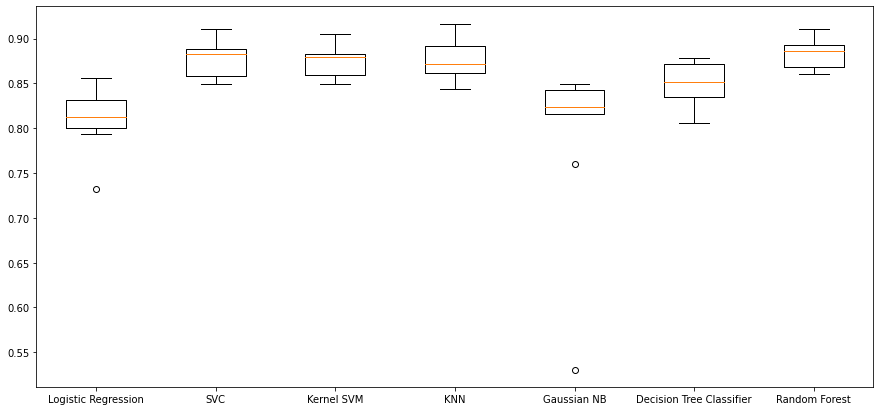

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Visualize classification algorithms using AUC Mean:



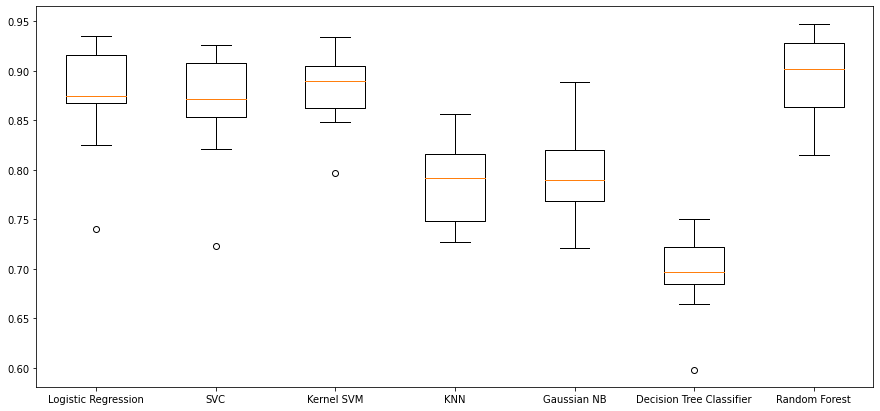

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In the second iteration Kernel SVM worked well.

From the first iteration of baseline classification algorithms, we can see that Random Forest and SVM have outperformed the other five models for the chosen dataset with the highest mean AUC Scores. Let’s reconfirm our results in the second iteration as shown in the next steps.

**Compare Baseline Classification Algorithms (2nd Iteration):**

 We know that false negatives are more costly than false positives in a response and hence let’s use precision, recall and F2 scores as the ideal metric for the model selection.

In [ ]:
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression(random_state = 0)))
classifiers.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
classifiers.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
classifiers.append(('KNN', KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski', p = 2)))
classifiers.append(('Gaussian NB', GaussianNB()))
classifiers.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
classifiers.append(('Random Forest', RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)))

In [ ]:
#Evaluating Model Results:
accuracy = []
precision = []
recall = []
f2_score = []
names = []

# set table to table to populate with performance results
col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F2 Score']
classifier_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model:
for name, classifier in classifiers:

    # Fitting Logistic Regression to the Training set
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    #Evaluate results
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred )
    rec = recall_score(y_test, y_pred )
    f2 = fbeta_score(y_test, y_pred, beta=2.0)


    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f2_score.append(f2)
    names.append(name)

    classifier_results.loc[i] = [name,
                         round(acc*100, 2),
                         round(prec*100, 2),
                         round(rec*100, 2),
                         round(f2*100, 2)
                         ]
    i += 1

In [ ]:
# View second iteration classifier results
classifier_results = classifier_results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(classifier_results)

                 Classifier  Accuracy  Precision  Recall  F2 Score
2                Kernel SVM     88.39      82.61   28.36     32.65
3                       KNN     87.28      81.25   19.40     22.89
6             Random Forest     88.39      72.73   35.82     39.87
1                       SVC     88.17      71.88   34.33     38.33
0       Logistic Regression     88.39      69.23   40.30     43.97
5  Decision Tree Classifier     83.26      44.29   46.27     45.86
4               Gaussian NB     78.35      35.00   52.24     47.55


From the 2nd iteration, we can definitely conclude that Kernel SVM is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Kernel SVM and evaluate its performance in the forthcoming sections.

# Model Evaluation

Train & evaluate Chosen Model: Let’s fit the selected model (Kernel SVM in this case) on the training dataset and evaluate the results.

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)


#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Kernel SVM', round(acc*100,2), round(prec*100,2), round(rec*100,2), round(f1*100,2), round(f2*100,2)]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

        Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Kernel SVM     88.39      82.61   28.36     42.22     32.65


In [ ]:
print("Accuracy of Kernel SVM Model in percentage - ", acc*100)

Accuracy of Kernel SVM Model in percentage -  88.39285714285714


In [ ]:
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
print("Kernel SVM Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Kernel SVM Classifier Accuracy: 0.87 (+/- 0.03)


Our Cross Validation results indicate that we would have an accuracy anywhere between 85% to 91% while running this model on any test set.

# Future Predictions

Visualize results on a Confusion Matrix: 


[[377   4]
 [ 48  19]]
Test Data Accuracy: 0.8839


<Figure size 2016x1440 with 0 Axes>

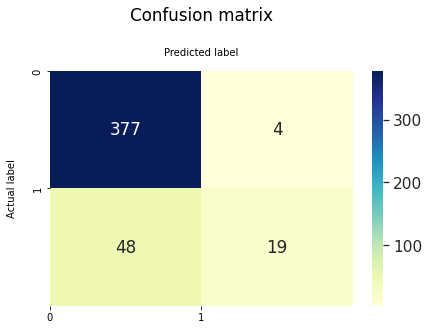

In [ ]:
# Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)

# Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred), rownames=['ACTUAL'],colnames=['PRED'])

# visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


The Confusion matrix indicates that we have 377+19 correct predictions and 48+4 incorrect predictions. 

Accuracy rate = number of correct predictions/ total predictions * 100 

Error rate = Number of wrong predictions / total predictions * 100 

We have got an accuracy of 89%; signalling the characteristics of a reasonably good model.

Lets check our final results by comapring response to previous campaign with our predicted response.

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['ID', 'Response', 'predictions']]

In [ ]:
display(final_results.head(30))

,ID,Response,predictions
848,2895,0,0
1613,1764,0,0
1893,6892,0,0
2052,2591,0,0
732,9384,0,0
1495,10770,0,0
319,2863,0,0
88,8504,0,0
890,1928,0,0
1980,3032,0,0


We can see that most of the predicted responses are correct.

Few are false predictions as well.

They can be due to multicollinearity between variables or due to irrelevant / unwanted data